In [ ]:
import pandas as pd

file_path = r"C:\Users\felic\Desktop\GELO-BOT\Province.csv"
data = pd.read_csv(file_path)

data.columns = data.columns.str.strip()

columns_of_interest = [
    'Poverty Incidence among Families Estimates (%) 2015u',
    'Poverty Incidence among Families Estimates (%) 2018u',
    'Magnitude of Poor Families Estimate (\'000) 2015u',
    'Magnitude of Poor Families Estimate (\'000) 2018u',
    'Poverty Incidence among Families Coefficient of Variation 2015u',
    'Poverty Incidence among Families Coefficient of Variation 2018u',
    'Poverty Incidence among Families Standard Error 2015u',
    'Poverty Incidence among Families Standard Error 2018u'
]

data[columns_of_interest] = data[columns_of_interest].apply(pd.to_numeric, errors='coerce')

try:
    selected_data = data[columns_of_interest]
    # Descriptive Statistics
    descriptive_stats = selected_data.describe()
    # Median
    medians = selected_data.median()
    # Range (Max - Min)
    range_values = selected_data.max() - selected_data.min()
    # Interquartile Range (IQR)
    iqr = selected_data.quantile(0.75) - selected_data.quantile(0.25)

   
    summary_stats = pd.DataFrame({
        'Mean': selected_data.mean(),
        'Median': medians,
        'Standard Deviation': selected_data.std(),
        'Range': range_values,
        'Interquartile Range (IQR)': iqr,
        'Min': selected_data.min(),
        'Max': selected_data.max()
    })

 
    print("\nSummary Statistics:")
    print(summary_stats)
except KeyError as e:
    print(f"Error: The following columns are not found in the dataset: {e}")



Summary Statistics:
                                                         Mean  Median  \
Poverty Incidence among Families Estimates (%) ...  24.213953   21.50   
Poverty Incidence among Families Estimates (%) ...  17.118391   14.40   
Magnitude of Poor Families Estimate ('000) 2015u    48.125581   31.55   
Magnitude of Poor Families Estimate ('000) 2018u    34.535632   26.60   
Poverty Incidence among Families Coefficient of...  18.525581   14.40   
Poverty Incidence among Families Coefficient of...  11.428736   10.20   
Poverty Incidence among Families Standard Error...   3.613953    3.35   
Poverty Incidence among Families Standard Error...   1.463218    1.40   

                                                    Standard Deviation  Range  \
Poverty Incidence among Families Estimates (%) ...           15.156270   71.6   
Poverty Incidence among Families Estimates (%) ...           13.908978   74.6   
Magnitude of Poor Families Estimate ('000) 2015u             42.631094  203.5 

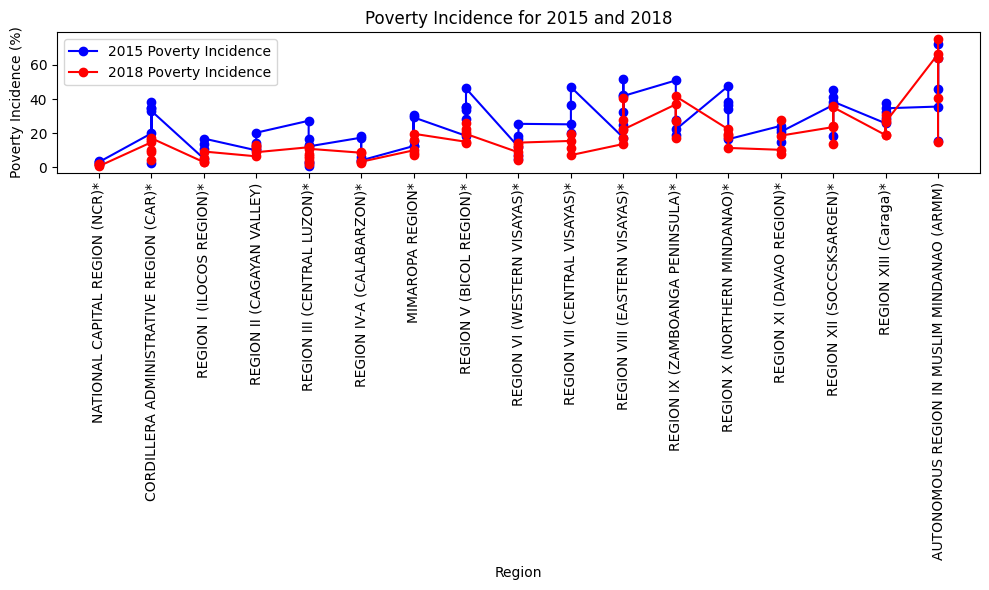

In [19]:
import matplotlib.pyplot as plt
import pandas as pd

file_path = r"C:\Users\felic\Desktop\GELO-BOT\Province.csv"
data = pd.read_csv(file_path)

data.columns = data.columns.str.strip().str.lower()

desired_columns_2015 = [
    "poverty incidence among families estimates (%) 2015u"
]

desired_columns_2018 = [
    "poverty incidence among families estimates (%) 2018u"
]

missing_columns_2015 = [col for col in desired_columns_2015 if col not in data.columns]
missing_columns_2018 = [col for col in desired_columns_2018 if col not in data.columns]

if missing_columns_2015:
    print(f"Missing columns for 2015: {missing_columns_2015}")
if missing_columns_2018:
    print(f"Missing columns for 2018: {missing_columns_2018}")

if not missing_columns_2015 and not missing_columns_2018:
    data[desired_columns_2015 + desired_columns_2018] = data[desired_columns_2015 + desired_columns_2018].apply(pd.to_numeric, errors='coerce')

    data = data.dropna(subset=['region'] + desired_columns_2015 + desired_columns_2018)

    x = data['region']
    y_2015 = data['poverty incidence among families estimates (%) 2015u']
    y_2018 = data['poverty incidence among families estimates (%) 2018u']

    plt.figure(figsize=(10, 6))

    plt.plot(x, y_2015, color='blue', label='2015 Poverty Incidence', marker='o')

    plt.plot(x, y_2018, color='red', label='2018 Poverty Incidence', marker='o')

    plt.xticks(rotation=90)
    plt.xlabel('Region')
    plt.ylabel('Poverty Incidence (%)')
    plt.title('Poverty Incidence for 2015 and 2018')
    plt.legend()
    plt.tight_layout()
    plt.show()
else:
    print("Data processing aborted due to missing columns.")


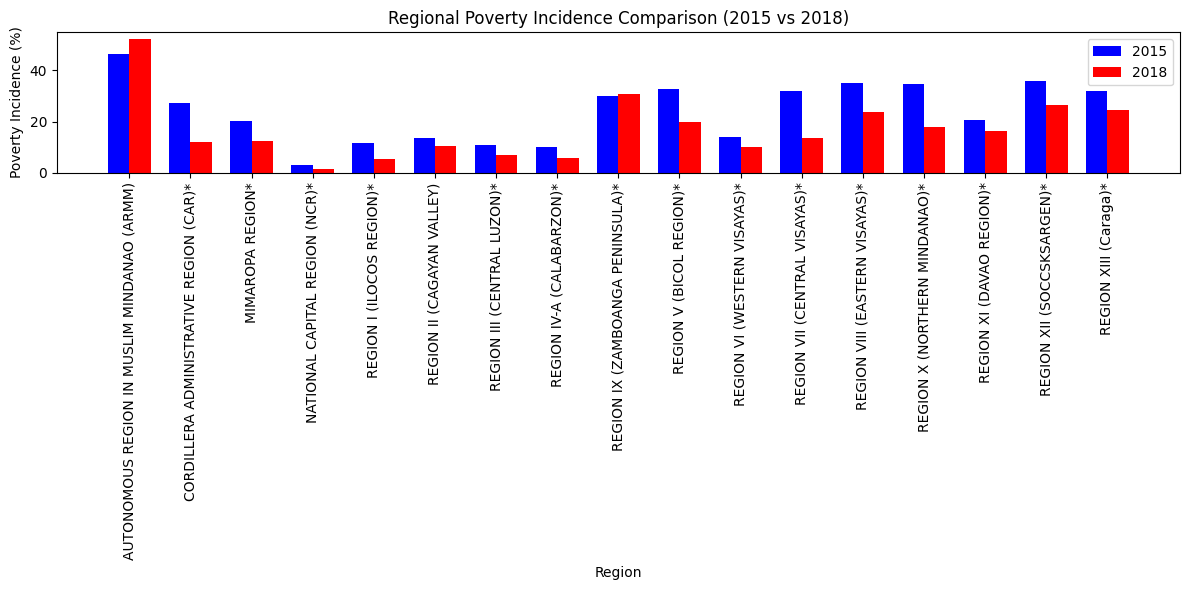

In [18]:
import matplotlib.pyplot as plt
import pandas as pd

file_path = r"C:\Users\felic\Desktop\GELO-BOT\Province.csv"
data = pd.read_csv(file_path)

data.columns = data.columns.str.strip().str.lower()

desired_columns_2015 = [
    "poverty incidence among families estimates (%) 2015u"
]

desired_columns_2018 = [
    "poverty incidence among families estimates (%) 2018u"
]

missing_columns_2015 = [col for col in desired_columns_2015 if col not in data.columns]
missing_columns_2018 = [col for col in desired_columns_2018 if col not in data.columns]

if missing_columns_2015:
    print(f"Missing columns for 2015: {missing_columns_2015}")
if missing_columns_2018:
    print(f"Missing columns for 2018: {missing_columns_2018}")

if not missing_columns_2015 and not missing_columns_2018:
    data[desired_columns_2015 + desired_columns_2018] = data[desired_columns_2015 + desired_columns_2018].apply(pd.to_numeric, errors='coerce')

    data = data.dropna(subset=['region'] + desired_columns_2015 + desired_columns_2018)

    data_grouped = data.groupby('region')[desired_columns_2015 + desired_columns_2018].mean().reset_index()

    regions = data_grouped['region']
    poverty_2015 = data_grouped['poverty incidence among families estimates (%) 2015u']
    poverty_2018 = data_grouped['poverty incidence among families estimates (%) 2018u']

    bar_width = 0.35
    index = range(len(regions))

    plt.figure(figsize=(12, 6))

    plt.bar(index, poverty_2015, bar_width, label='2015', color='blue')

    plt.bar([i + bar_width for i in index], poverty_2018, bar_width, label='2018', color='red')

    plt.xticks([i + bar_width / 2 for i in index], regions, rotation=90)
    plt.xlabel('Region')
    plt.ylabel('Poverty Incidence (%)')
    plt.title('Regional Poverty Incidence Comparison (2015 vs 2018)')
    plt.legend()
    plt.tight_layout()
    plt.show()
else:
    print("Data processing aborted due to missing columns.")


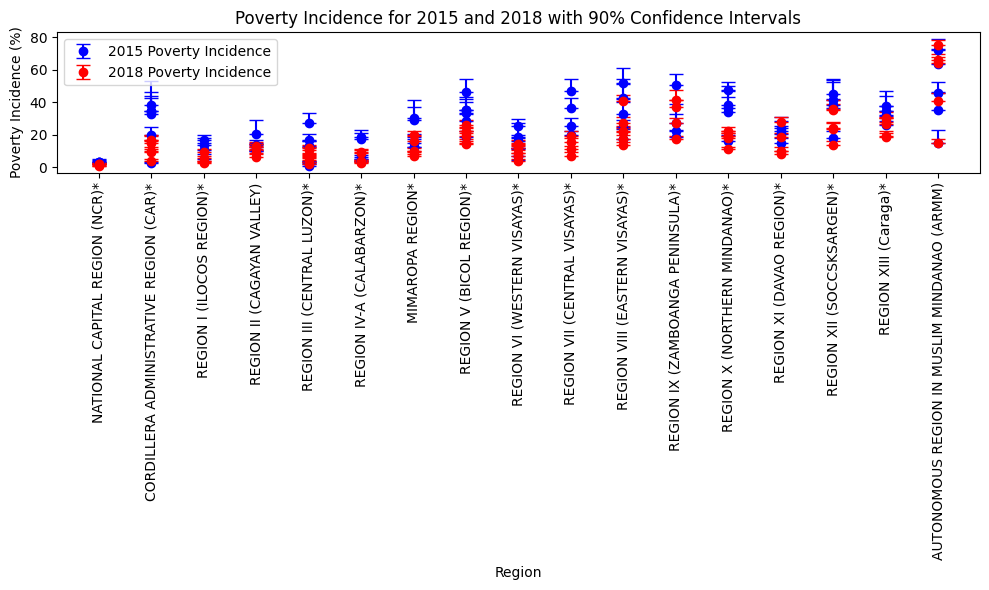

In [17]:
import matplotlib.pyplot as plt
import pandas as pd

file_path = r"C:\Users\felic\Desktop\GELO-BOT\Province.csv"
data = pd.read_csv(file_path)

data.columns = data.columns.str.strip().str.lower()

desired_columns_2015 = [
    "poverty incidence among families estimates (%) 2015u",
    "poverty incidence among families 90% confidence interval 2015u lower limit",
    "poverty incidence among families 90% confidence interval 2015u upper limit"
]

desired_columns_2018 = [
    "poverty incidence among families estimates (%) 2018u",
    "poverty incidence among families 90% confidence interval 2018u lower limit",
    "poverty incidence among families 90% confidence interval 2018u upper limit"
]

missing_columns_2015 = [col for col in desired_columns_2015 if col not in data.columns]
missing_columns_2018 = [col for col in desired_columns_2018 if col not in data.columns]

if missing_columns_2015:
    print(f"Missing columns for 2015: {missing_columns_2015}")
if missing_columns_2018:
    print(f"Missing columns for 2018: {missing_columns_2018}")

if not missing_columns_2015 and not missing_columns_2018:
    data[desired_columns_2015 + desired_columns_2018] = data[desired_columns_2015 + desired_columns_2018].apply(pd.to_numeric, errors='coerce')

    data = data.dropna(subset=['region'] + desired_columns_2015 + desired_columns_2018)

    data['poverty incidence difference'] = data['poverty incidence among families estimates (%) 2018u'] - data['poverty incidence among families estimates (%) 2015u']
    data['lower limit difference'] = data['poverty incidence among families 90% confidence interval 2018u lower limit'] - data['poverty incidence among families 90% confidence interval 2015u lower limit']
    data['upper limit difference'] = data['poverty incidence among families 90% confidence interval 2018u upper limit'] - data['poverty incidence among families 90% confidence interval 2015u upper limit']

    x = data['region']
    y_2015 = data['poverty incidence among families estimates (%) 2015u']
    yerr_lower_2015 = data['poverty incidence among families 90% confidence interval 2015u lower limit'] - y_2015
    yerr_upper_2015 = data['poverty incidence among families 90% confidence interval 2015u upper limit'] - y_2015
    
    y_2018 = data['poverty incidence among families estimates (%) 2018u']
    yerr_lower_2018 = data['poverty incidence among families 90% confidence interval 2018u lower limit'] - y_2018
    yerr_upper_2018 = data['poverty incidence among families 90% confidence interval 2018u upper limit'] - y_2018

    yerr_lower_2015 = yerr_lower_2015.clip(lower=0)
    yerr_upper_2015 = yerr_upper_2015.clip(lower=0)
    
    yerr_lower_2018 = yerr_lower_2018.clip(lower=0)
    yerr_upper_2018 = yerr_upper_2018.clip(lower=0)

    plt.figure(figsize=(10, 6))

    plt.errorbar(x, y_2015, yerr=[yerr_lower_2015, yerr_upper_2015], fmt='o', color='blue', capsize=5, label='2015 Poverty Incidence')

    plt.errorbar(x, y_2018, yerr=[yerr_lower_2018, yerr_upper_2018], fmt='o', color='red', capsize=5, label='2018 Poverty Incidence')

    plt.xticks(rotation=90)
    plt.xlabel('Region')
    plt.ylabel('Poverty Incidence (%)')
    plt.title('Poverty Incidence for 2015 and 2018 with 90% Confidence Intervals')
    plt.legend()
    plt.tight_layout()
    plt.show()
else:
    print("Data processing aborted due to missing columns.")


posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


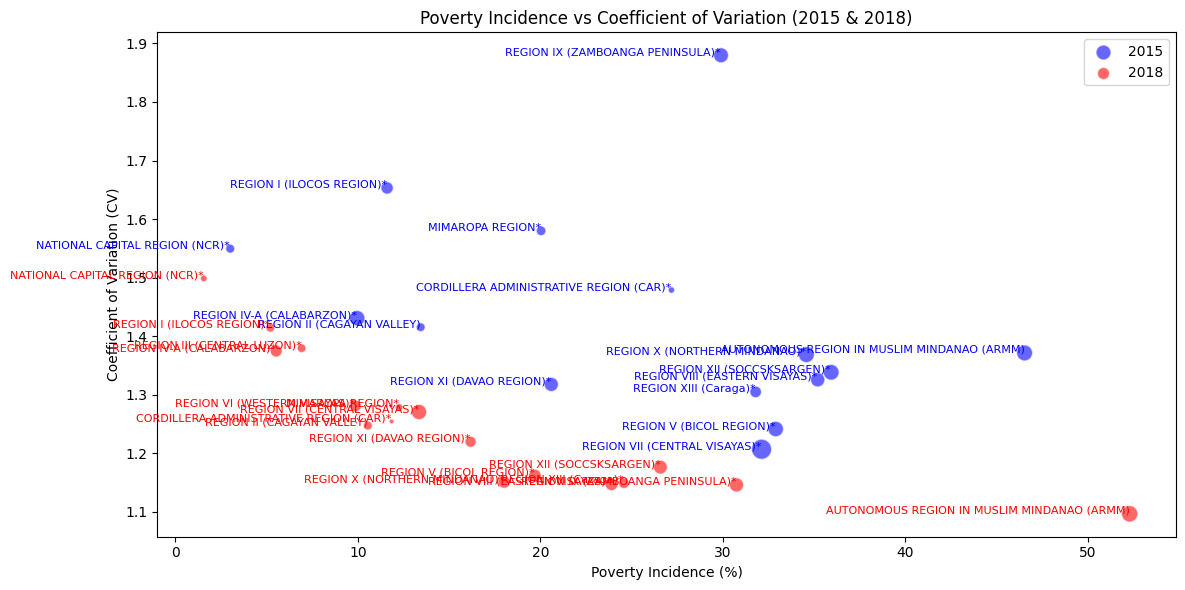

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

file_path = r"C:\Users\felic\Desktop\GELO-BOT\Province.csv"
data = pd.read_csv(file_path)

data.columns = data.columns.str.strip().str.lower()

columns_2015 = [
    "poverty incidence among families estimates (%) 2015u",
    "poverty incidence among families 90% confidence interval 2015u lower limit",
    "poverty incidence among families 90% confidence interval 2015u upper limit",
    "magnitude of poor families estimate ('000) 2015u",
    "region"
]

columns_2018 = [
    "poverty incidence among families estimates (%) 2018u",
    "poverty incidence among families 90% confidence interval 2018u lower limit",
    "poverty incidence among families 90% confidence interval 2018u upper limit",
    "magnitude of poor families estimate ('000) 2018u",
    "region"
]

missing_columns_2015 = [col for col in columns_2015 if col not in data.columns]
missing_columns_2018 = [col for col in columns_2018 if col not in data.columns]

if missing_columns_2015:
    print(f"Missing columns for 2015: {missing_columns_2015}")
if missing_columns_2018:
    print(f"Missing columns for 2018: {missing_columns_2018}")

if not missing_columns_2015 and not missing_columns_2018:
    numeric_columns_2015 = columns_2015[:-1]
    numeric_columns_2018 = columns_2018[:-1]
    data[numeric_columns_2015] = data[numeric_columns_2015].apply(pd.to_numeric, errors='coerce')
    data[numeric_columns_2018] = data[numeric_columns_2018].apply(pd.to_numeric, errors='coerce')

    data = data.dropna(subset=columns_2015 + columns_2018)

    data['cv_2015'] = data['poverty incidence among families estimates (%) 2015u'] / data['poverty incidence among families 90% confidence interval 2015u lower limit']
    data['cv_2018'] = data['poverty incidence among families estimates (%) 2018u'] / data['poverty incidence among families 90% confidence interval 2018u lower limit']

    grouped_data_2015 = data.groupby('region').agg({
        "poverty incidence among families estimates (%) 2015u": "mean",
        "cv_2015": "mean",
        "magnitude of poor families estimate ('000) 2015u": "mean"
    }).reset_index()

    grouped_data_2018 = data.groupby('region').agg({
        "poverty incidence among families estimates (%) 2018u": "mean",
        "cv_2018": "mean",
        "magnitude of poor families estimate ('000) 2018u": "mean"
    }).reset_index()

    x_2015 = grouped_data_2015["poverty incidence among families estimates (%) 2015u"]
    y_2015 = grouped_data_2015["cv_2015"]
    size_2015 = grouped_data_2015["magnitude of poor families estimate ('000) 2015u"]
    regions_2015 = grouped_data_2015["region"]

    x_2018 = grouped_data_2018["poverty incidence among families estimates (%) 2018u"]
    y_2018 = grouped_data_2018["cv_2018"]
    size_2018 = grouped_data_2018["magnitude of poor families estimate ('000) 2018u"]
    regions_2018 = grouped_data_2018["region"]

    plt.figure(figsize=(12, 6))

    plt.scatter(x_2015, y_2015, s=size_2015 * 2, color='blue', alpha=0.6, edgecolors='w', marker='o', label='2015')
    for i, region in enumerate(regions_2015):
        plt.text(x_2015.iloc[i], y_2015.iloc[i], str(region), fontsize=8, ha='right', color='blue')

    plt.scatter(x_2018, y_2018, s=size_2018 * 2, color='red', alpha=0.6, edgecolors='w', marker='o', label='2018')
    for i, region in enumerate(regions_2018):
        plt.text(x_2018.iloc[i], y_2018.iloc[i], str(region), fontsize=8, ha='right', color='red')

    plt.xlabel('Poverty Incidence (%)')
    plt.ylabel('Coefficient of Variation (CV)')
    plt.title('Poverty Incidence vs Coefficient of Variation (2015 & 2018)')
    plt.legend()

    plt.tight_layout()
    plt.show()


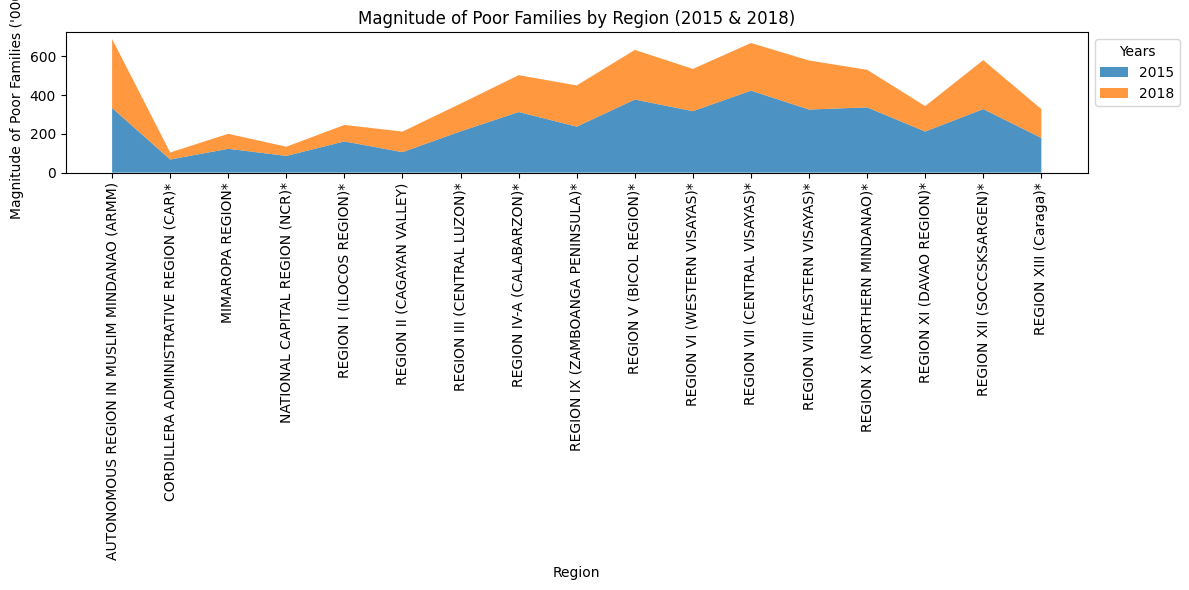

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

file_path = r"C:\Users\felic\Desktop\GELO-BOT\Province.csv"
data = pd.read_csv(file_path)

data.columns = data.columns.str.strip().str.lower()

columns_2015 = [
    "magnitude of poor families estimate ('000) 2015u",
    "region"
]
columns_2018 = [
    "magnitude of poor families estimate ('000) 2018u",
    "region"
]

missing_columns_2015 = [col for col in columns_2015 if col not in data.columns]
missing_columns_2018 = [col for col in columns_2018 if col not in data.columns]

if missing_columns_2015:
    print(f"Missing columns for 2015: {missing_columns_2015}")
if missing_columns_2018:
    print(f"Missing columns for 2018: {missing_columns_2018}")

if not missing_columns_2015 and not missing_columns_2018:
    data[columns_2015[0]] = pd.to_numeric(data[columns_2015[0]], errors='coerce')
    data[columns_2018[0]] = pd.to_numeric(data[columns_2018[0]], errors='coerce')

    data = data.dropna(subset=columns_2015 + columns_2018)

    grouped_2015 = data.groupby("region")["magnitude of poor families estimate ('000) 2015u"].sum()
    grouped_2018 = data.groupby("region")["magnitude of poor families estimate ('000) 2018u"].sum()

    stacked_data = pd.DataFrame({
        "2015": grouped_2015,
        "2018": grouped_2018
    })

    stacked_data = stacked_data.sort_index()

    x = stacked_data.index
    y = stacked_data.values.T

    plt.figure(figsize=(12, 6))
    plt.stackplot(x, y, labels=["2015", "2018"], alpha=0.8)

    plt.legend(loc='upper left', title='Years', bbox_to_anchor=(1, 1))
    plt.title("Magnitude of Poor Families by Region (2015 & 2018)")
    plt.xlabel("Region")
    plt.ylabel("Magnitude of Poor Families ('000)")
    plt.xticks(rotation=90)
    plt.tight_layout()

    plt.show()


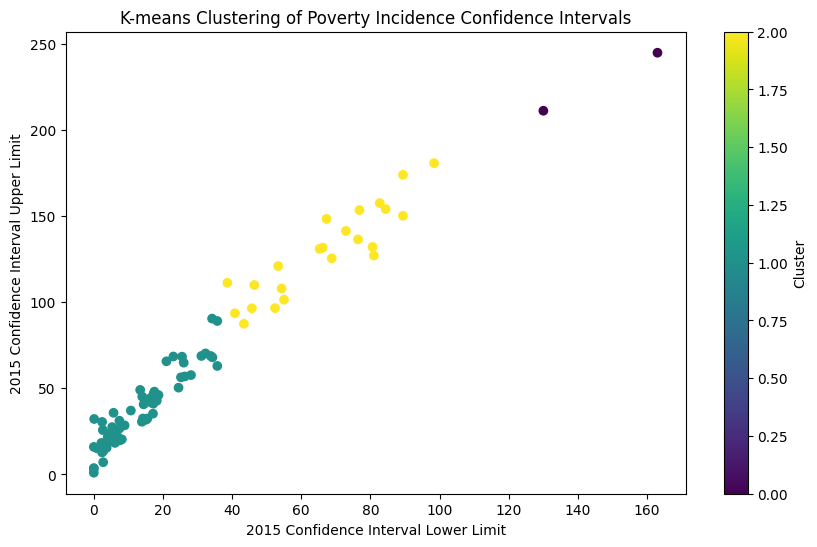

In [3]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Read the CSV file
df = pd.read_csv('Province.csv')

# Preprocess the data
df.columns = df.columns.str.strip()  # Remove any extra whitespace in column names
columns_of_interest = [
    "Magnitude of Poor Families 90% Confidence Interval 2015u Lower Limit",
    "Magnitude of Poor Families 90% Confidence Interval 2015u Upper Limit",
    "Magnitude of Poor Families 90% Confidence Interval 2018u Lower Limit",
    "Magnitude of Poor Families 90% Confidence Interval 2018u Upper Limit",
]

# Convert the selected columns to numeric and drop NaN values
for col in columns_of_interest:
    df[col] = pd.to_numeric(df[col], errors='coerce')
df.dropna(subset=columns_of_interest, inplace=True)

# Extract the relevant columns for clustering
X = df[columns_of_interest]

# Perform K-means clustering
kmeans = KMeans(n_clusters=3, random_state=0)
df['Cluster'] = kmeans.fit_predict(X)

# Visualize the clusters using the first two dimensions
plt.figure(figsize=(10, 6))
plt.scatter(
    df["Magnitude of Poor Families 90% Confidence Interval 2015u Lower Limit"],
    df["Magnitude of Poor Families 90% Confidence Interval 2015u Upper Limit"],
    c=df['Cluster'], cmap='viridis'
)
plt.xlabel('2015 Confidence Interval Lower Limit')
plt.ylabel('2015 Confidence Interval Upper Limit')
plt.title('K-means Clustering of Poverty Incidence Confidence Intervals')
plt.colorbar(label='Cluster')
plt.show()



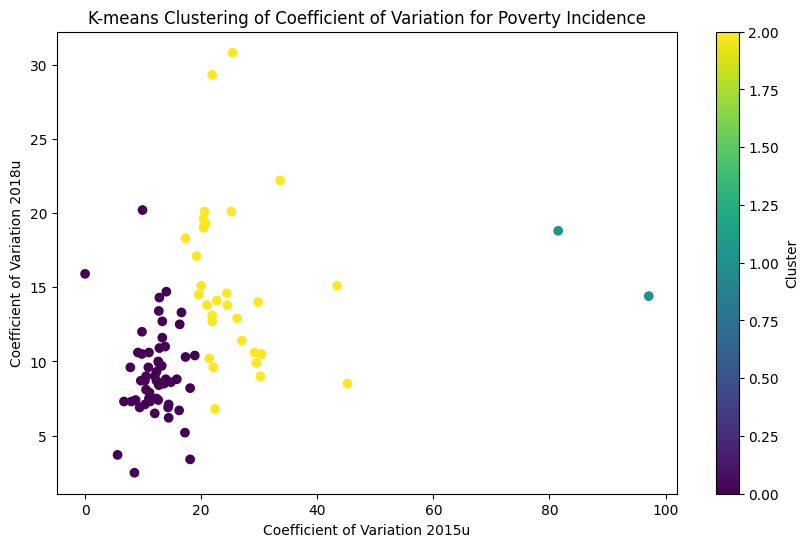

In [4]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Read the CSV file
df = pd.read_csv('Province.csv')

# Preprocess the data
df.columns = df.columns.str.strip()  # Remove any extra whitespace in column names

# Select the relevant columns for the coefficient of variation
columns_of_interest = [
    "Poverty Incidence among Families Coefficient of Variation 2015u",
    "Poverty Incidence among Families Coefficient of Variation 2018u"
]

# Convert the selected columns to numeric and drop rows with missing values
for col in columns_of_interest:
    df[col] = pd.to_numeric(df[col], errors='coerce')
df.dropna(subset=columns_of_interest, inplace=True)

# Extract the relevant columns for clustering
X = df[columns_of_interest]

# Perform K-means clustering
kmeans = KMeans(n_clusters=3, random_state=0)
df['Cluster'] = kmeans.fit_predict(X)

# Visualize the clusters
plt.figure(figsize=(10, 6))
plt.scatter(
    df["Poverty Incidence among Families Coefficient of Variation 2015u"],
    df["Poverty Incidence among Families Coefficient of Variation 2018u"],
    c=df['Cluster'], cmap='viridis'
)
plt.xlabel('Coefficient of Variation 2015u')
plt.ylabel('Coefficient of Variation 2018u')
plt.title('K-means Clustering of Coefficient of Variation for Poverty Incidence')
plt.colorbar(label='Cluster')
plt.show()



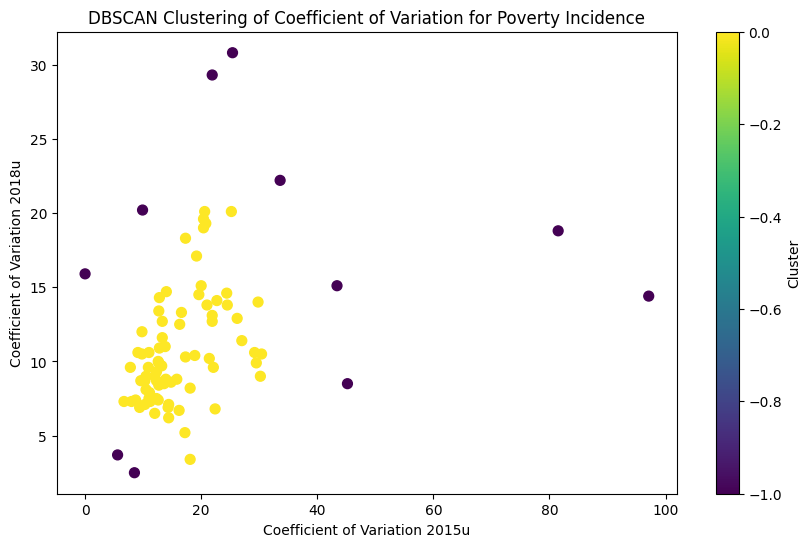

In [5]:
import pandas as pd
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Read the CSV file
df = pd.read_csv('Province.csv')

# Preprocess the data
df.columns = df.columns.str.strip()  # Remove any extra whitespace in column names
columns_of_interest = [
    "Poverty Incidence among Families Coefficient of Variation 2015u",
    "Poverty Incidence among Families Coefficient of Variation 2018u"
]

# Convert the selected columns to numeric and drop rows with missing values
for col in columns_of_interest:
    df[col] = pd.to_numeric(df[col], errors='coerce')
df.dropna(subset=columns_of_interest, inplace=True)

# Extract the relevant columns and standardize the data
X = df[columns_of_interest]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply DBSCAN Clustering
dbscan = DBSCAN(eps=0.5, min_samples=5)  # You can adjust eps and min_samples for better results
df['Cluster'] = dbscan.fit_predict(X_scaled)

# Visualize the clusters
plt.figure(figsize=(10, 6))
plt.scatter(
    df[columns_of_interest[0]],
    df[columns_of_interest[1]],
    c=df['Cluster'], cmap='viridis', s=50
)
plt.xlabel('Coefficient of Variation 2015u')
plt.ylabel('Coefficient of Variation 2018u')
plt.title('DBSCAN Clustering of Coefficient of Variation for Poverty Incidence')
plt.colorbar(label='Cluster')
plt.show()



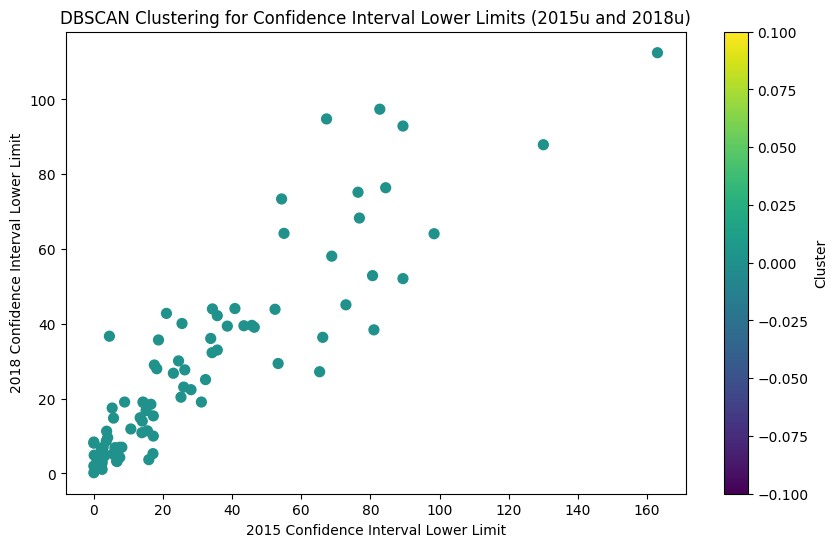

In [13]:
# Define lower limit columns
lower_limit_columns = [
    "Magnitude of Poor Families 90% Confidence Interval 2015u Lower Limit",
    "Magnitude of Poor Families 90% Confidence Interval 2018u Lower Limit"
]

# Convert the selected columns to numeric and drop rows with missing values
for col in lower_limit_columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')
df.dropna(subset=lower_limit_columns, inplace=True)

# Extract and standardize the relevant data
X_lower = df[lower_limit_columns]
scaler_lower = StandardScaler()
X_scaled_lower = scaler_lower.fit_transform(X_lower)

# Apply DBSCAN Clustering
dbscan_lower = DBSCAN(eps=1.5, min_samples=5)  # Adjust eps and min_samples if needed
df['Cluster_Lower'] = dbscan_lower.fit_predict(X_scaled_lower)

# Visualize the clusters for Lower Limits
plt.figure(figsize=(10, 6))
plt.scatter(
    df[lower_limit_columns[0]], df[lower_limit_columns[1]],
    c=df['Cluster_Lower'], cmap='viridis', s=50
)
plt.xlabel('2015 Confidence Interval Lower Limit')
plt.ylabel('2018 Confidence Interval Lower Limit')
plt.title('DBSCAN Clustering for Confidence Interval Lower Limits (2015u and 2018u)')
plt.colorbar(label='Cluster')
plt.show()

# Optional: Save the results
df.to_csv("DBSCAN_Clustered_Lower_Limits.csv", index=False)


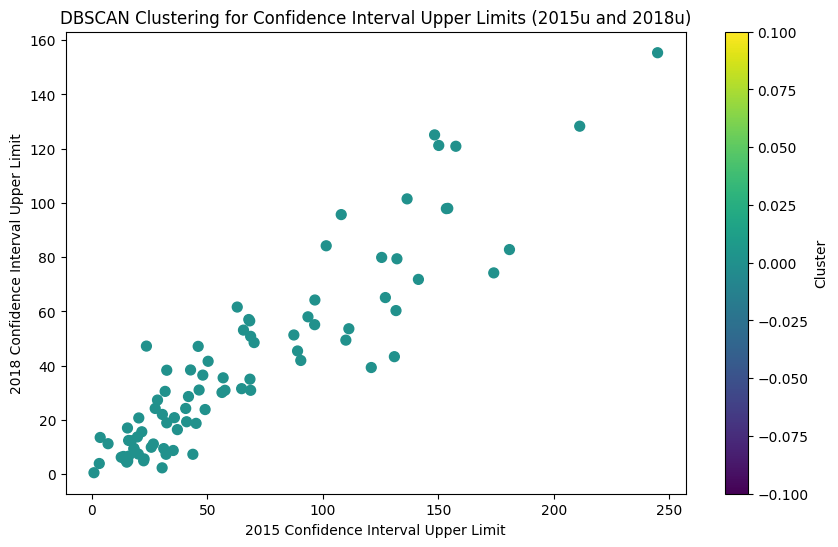

In [14]:
import pandas as pd
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Read the CSV file
df = pd.read_csv('Province.csv')

# Preprocess the data
df.columns = df.columns.str.strip()  # Remove extra whitespace in column names
upper_limit_columns = [
    "Magnitude of Poor Families 90% Confidence Interval 2015u Upper Limit",
    "Magnitude of Poor Families 90% Confidence Interval 2018u Upper Limit"
]

# Convert the selected columns to numeric and drop rows with missing values
for col in upper_limit_columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')
df.dropna(subset=upper_limit_columns, inplace=True)

# Extract and standardize the relevant data
X_upper = df[upper_limit_columns]
scaler_upper = StandardScaler()
X_scaled_upper = scaler_upper.fit_transform(X_upper)

# Apply DBSCAN Clustering
dbscan_upper = DBSCAN(eps=1.5, min_samples=5)  # Adjust eps and min_samples if needed
df['Cluster_Upper'] = dbscan_upper.fit_predict(X_scaled_upper)

# Visualize the clusters for Upper Limits
plt.figure(figsize=(10, 6))
plt.scatter(
    df[upper_limit_columns[0]], df[upper_limit_columns[1]],
    c=df['Cluster_Upper'], cmap='viridis', s=50
)
plt.xlabel('2015 Confidence Interval Upper Limit')
plt.ylabel('2018 Confidence Interval Upper Limit')
plt.title('DBSCAN Clustering for Confidence Interval Upper Limits (2015u and 2018u)')
plt.colorbar(label='Cluster')
plt.show()

# Optional: Save the results
df.to_csv("DBSCAN_Clustered_Upper_Limits.csv", index=False)


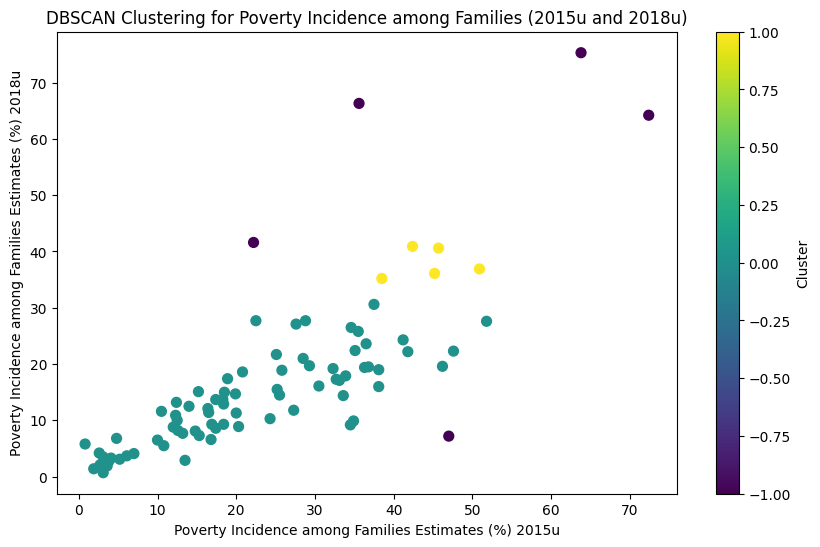

In [12]:
import pandas as pd
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Read the CSV file
df = pd.read_csv('Province.csv')

# Preprocess the data
df.columns = df.columns.str.strip()  # Remove extra whitespace in column names
poverty_incidence_columns = [
    "Poverty Incidence among Families Estimates (%) 2015u",
    "Poverty Incidence among Families Estimates (%) 2018u"
]

# Convert the selected columns to numeric and drop rows with missing values
for col in poverty_incidence_columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')
df.dropna(subset=poverty_incidence_columns, inplace=True)

# Extract and standardize the relevant data
X_poverty = df[poverty_incidence_columns]
scaler_poverty = StandardScaler()
X_scaled_poverty = scaler_poverty.fit_transform(X_poverty)

# Apply DBSCAN Clustering
dbscan_poverty = DBSCAN(eps=0.5, min_samples=5)  # Adjust eps and min_samples if needed
df['Cluster_Poverty'] = dbscan_poverty.fit_predict(X_scaled_poverty)

# Visualize the clusters for Poverty Incidence
plt.figure(figsize=(10, 6))
plt.scatter(
    df[poverty_incidence_columns[0]], df[poverty_incidence_columns[1]],
    c=df['Cluster_Poverty'], cmap='viridis', s=50
)
plt.xlabel('Poverty Incidence among Families Estimates (%) 2015u')
plt.ylabel('Poverty Incidence among Families Estimates (%) 2018u')
plt.title('DBSCAN Clustering for Poverty Incidence among Families (2015u and 2018u)')
plt.colorbar(label='Cluster')
plt.show()

# Optional: Save the results
df.to_csv("DBSCAN_Clustered_Poverty_Incidence.csv", index=False)
